<a href="https://colab.research.google.com/github/MuktaRedij/VisionCraft-AI-Text-to-Image-Generator/blob/main/AI_Text_to_Image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 📦 Install required Python libraries for Stable Diffusion, GPU support, and UI.
# These commands only need to run the first time or in a new environment
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers transformers accelerate safetensors pillow


Looking in indexes: https://download.pytorch.org/whl/cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightphe 0.0.15 requires sympy==1.12, but you have sympy 1.14.0 which is incompatible.


In [1]:
# 🔧 Hardware Check
# This cell checks whether the system is using a GPU or CPU.
# GPU (CUDA) significantly speeds up Stable Diffusion generation,
# while CPU mode will still work but much slower.

import torch

print("GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Using:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU — this will be slower.")


GPU Available: False
Running on CPU — this will be slower.


In [2]:
# 🚀 Load Stable Diffusion Model
# This cell loads the text-to-image generation model.
# If a GPU is available, the model will run faster using float16 precision.
# Otherwise, it falls back to CPU mode (slower but still functional).

from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import time, os

# Model choice (Open Source)
MODEL_NAME = "runwayml/stable-diffusion-v1-5"

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
    safety_checker=None,
)

pipe.to(device)

print("Model loaded successfully!")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Model loaded successfully!


In [3]:
# ✨ Prompt Enhancement Function
# This function improves the user's input by applying a selected style preset.
# Style presets help the model generate more consistent and high-quality results.
# The function returns a final combined prompt that is passed to Stable Diffusion.

def build_prompt(base_prompt, style="photorealistic"):
    styles = {
        "photorealistic": "ultra high resolution, 4k, photorealistic, detailed, sharp",
        "artistic": "digital art, painterly, rich texture, concept art, fantasy",
        "cartoon": "cartoon style, colorful, outlined, simple shading, cute",
    }

    style_component = styles.get(style.lower(), "")
    return f"{base_prompt}, {style_component}"


In [4]:
# 🖼 Image Generation Function
# This function sends the final prompt to the Stable Diffusion model
# and generates one or multiple images based on user-selected settings.
# Parameters allow customization for image count, style, quality, and output consistency.

def generate_images(
    prompt="a futuristic city at sunset",
    num_images=1,
    steps=30,
    guidance_scale=7.5,
    style="photorealistic",
    negative_prompt="bad quality, distorted, low resolution"
):
    full_prompt = build_prompt(prompt, style)
    print("Final Prompt:", full_prompt)

    generator = torch.Generator(device=device).manual_seed(42)

    start = time.time()

    result = pipe(
        prompt=full_prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=steps,
        guidance_scale=guidance_scale,
        num_images_per_prompt=num_images,
        generator=generator,
    )

    print(f"Generation Time: {round(time.time() - start,2)} sec")
    return result.images


Final Prompt: a medieval castle on floating rocks above clouds, digital art, painterly, rich texture, concept art, fantasy


  0%|          | 0/30 [00:00<?, ?it/s]

Generation Time: 2373.65 sec


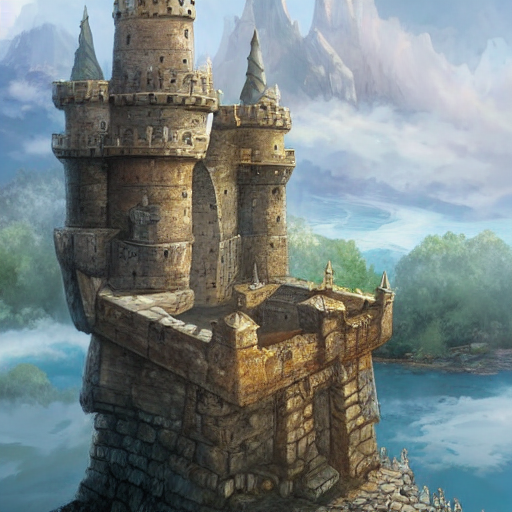

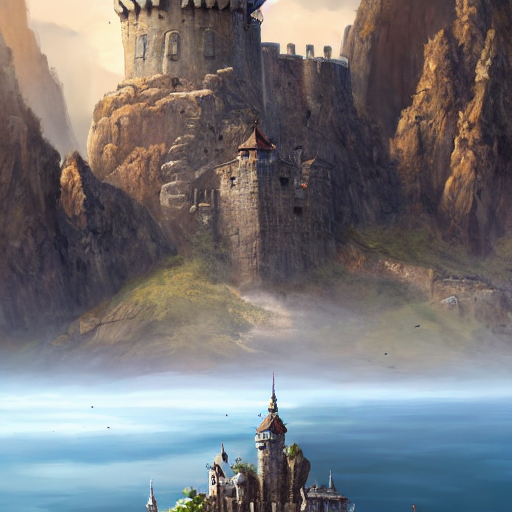

In [5]:
# ▶ Test Image Generation
# This cell demonstrates how to call the generate_images() function directly.
# You can modify the prompt, number of images, and style to experiment before using the UI.

images = generate_images(
    prompt="a medieval castle on floating rocks above clouds",
    num_images=2,
    style="artistic"
)

for img in images:
    display(img)


In [6]:
# 💾 Image Saving Function
# This function saves generated images into a uniquely timestamped folder.
# It also stores useful metadata such as the prompt, model used, device type, and generation time.


import json
from datetime import datetime

def save_images(images, prompt):
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    folder = f"generated_{timestamp}"
    os.makedirs(folder, exist_ok=True)

    metadata = {
        "prompt": prompt,
        "timestamp": timestamp,
        "model": MODEL_NAME,
        "device": device
    }

    with open(f"{folder}/metadata.json", "w") as f:
        json.dump(metadata, f, indent=4)

    for idx, img in enumerate(images):
        img.save(f"{folder}/image_{idx+1}.png")

    return folder

folder_name = save_images(images, "test prompt")
folder_name


'generated_2025-11-26_15-08-35'

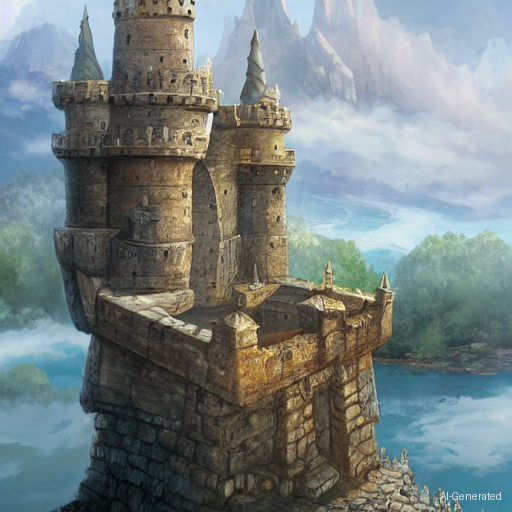

In [7]:
# 🏷 Watermark Function
# This function adds a small, semi-transparent watermark to the bottom-right corner
# of a generated image to indicate that the content was AI-created.
# This supports responsible AI usage and transparency.

from PIL import ImageDraw, ImageFont

def watermark(img, text="AI-Generated"):
    img = img.convert("RGBA")
    width, height = img.size

    overlay = Image.new("RGBA", img.size, (0,0,0,0))
    draw = ImageDraw.Draw(overlay)

    font = ImageFont.load_default()
    text_width, text_height = draw.textlength(text, font), 12

    x, y = width - text_width - 10, height - text_height - 10
    draw.text((x,y), text, fill=(255,255,255,200), font=font)

    return Image.alpha_composite(img, overlay).convert("RGB")

watermarked_img = watermark(images[0])
display(watermarked_img)


In [2]:
# 🖥️ VisionCraft UI — Stable Diffusion Text-to-Image Generator
# This section connects the model, generation settings, and user interface using Gradio.
# Users can enter a prompt, adjust style and generation settings, and download generated images.

import gradio as gr
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image, ImageDraw, ImageFont
import time, os

# ------------------ Device Check ------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔍 Running on: {device.upper()}")


# ------------------ Load Model ------------------
def load_model():
    dtype = torch.float16 if device == "cuda" else torch.float32

    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=dtype,
        safety_checker=None  # You may add a filter later
    ).to(device)

    print("✅ Model Loaded Successfully")
    return pipe

pipe = load_model()


# ------------------ Watermark Function (Fixed for Pillow) ------------------
def add_watermark(image, text="AI Generated"):
    image = image.convert("RGBA")
    overlay = Image.new("RGBA", image.size)
    draw = ImageDraw.Draw(overlay)
    font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), text, font=font)
    text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]

    w, h = image.size
    draw.text(
        (w - text_w - 12, h - text_h - 12),
        text,
        font=font,
        fill=(255, 255, 255, 180)
    )

    return Image.alpha_composite(image, overlay).convert("RGB")


# ------------------ Prompt Enhancer ------------------
def stylize(prompt, style):
    presets = {
        "Photorealistic": "ultra realistic, 4k, sharp, detailed lighting",
        "Artistic": "digital painting, vivid brush strokes, concept art, dramatic",
        "Cartoon": "cartoon, cell shading, smooth lines, colorful"
    }
    return f"{prompt}, {presets[style]}"


# ------------------ Generation Function ------------------
def generate(prompt, style, guidance, negative):

    if not prompt.strip():
        return "⚠ Please enter a prompt."

    enhanced = stylize(prompt, style)

    steps = 15 if device == "cuda" else 8  # CPU-safe speed

    print(f"🎨 Prompt: {enhanced}")
    print(f"⚙ Steps: {steps}")

    start = time.time()
    result = pipe(
        enhanced,
        guidance_scale=guidance,
        negative_prompt=negative,
        num_inference_steps=steps
    )
    duration = round(time.time() - start, 2)

    img = add_watermark(result.images[0])
    os.makedirs("generated", exist_ok=True)
    filename = f"generated/{int(time.time())}.png"
    img.save(filename)

    print(f"⏱ Done in {duration} seconds → Saved as {filename}")

    return img


# ------------------ UI ------------------
ui = gr.Interface(
    fn=generate,
    inputs=[
        gr.Textbox(label="Prompt", placeholder="Example: A futuristic floating castle"),
        gr.Dropdown(["Photorealistic", "Artistic", "Cartoon"], value="Photorealistic", label="Style"),
        gr.Slider(1, 15, value=7.5, label="Guidance Strength"),
        gr.Textbox(label="Negative Prompt", value="low quality, blurry, distorted")
    ],
    outputs=gr.Image(label="Generated Image"),
    title="🖼️ Stable Diffusion Image Generator",
    description="Optimized UI for Google Colab — GPU recommended, CPU possible (slower)."
)

ui.launch(share=True, debug=True)


🔍 Running on: CUDA


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ Model Loaded Successfully
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://406b6de32816f6e67d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


🎨 Prompt: a floating house, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.54 seconds → Saved as generated/1764174212.png
🎨 Prompt: a floating  tree house, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.42 seconds → Saved as generated/1764174227.png
🎨 Prompt: a  cruise, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.41 seconds → Saved as generated/1764174245.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.45 seconds → Saved as generated/1764174303.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.43 seconds → Saved as generated/1764174308.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, cartoon, cell shading, smooth lines, colorful
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.45 seconds → Saved as generated/1764174319.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, cartoon, cell shading, smooth lines, colorful
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.43 seconds → Saved as generated/1764174366.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, ultra realistic, 4k, sharp, detailed lighting
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.44 seconds → Saved as generated/1764174377.png
🎨 Prompt: A cup of hot chocolate beside a rainy window with soft lighting, digital painting, vivid brush strokes, concept art, dramatic
⚙ Steps: 15


  0%|          | 0/15 [00:00<?, ?it/s]

⏱ Done in 2.45 seconds → Saved as generated/1764174387.png
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://406b6de32816f6e67d.gradio.live
